<a href="https://colab.research.google.com/github/sinjoo83/Python_practice/blob/main/life_expectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [83]:
df=pd.read_csv("Life_expectancy_at_birth _years.csv")

In [84]:
df.head(2)

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,WHOSIS_000001,Life expectancy at birth (years),text,AFR,Africa,Country,LSO,Lesotho,Year,2019,...,NaN,NaN,NaN,NaN,NaN,47.66,NaN,NaN,EN,2020-12-04T00:00:00.000Z
1,WHOSIS_000001,Life expectancy at birth (years),text,AFR,Africa,Country,CAF,Central African Republic,Year,2019,...,NaN,NaN,NaN,NaN,NaN,50.21,NaN,NaN,EN,2020-12-04T00:00:00.000Z


In [85]:
df.tail(2)

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
4390,WHOSIS_000015,Life expectancy at age 60 (years),text,EUR,Europe,Country,FRA,France,Year,2000,...,NaN,NaN,NaN,NaN,NaN,25.29,NaN,NaN,EN,2020-12-04T00:00:00.000Z
4391,WHOSIS_000015,Life expectancy at age 60 (years),text,WPR,Western Pacific,Country,JPN,Japan,Year,2000,...,NaN,NaN,NaN,NaN,NaN,26.59,NaN,NaN,EN,2020-12-04T00:00:00.000Z


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4392 entries, 0 to 4391
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   IndicatorCode               4392 non-null   object 
 1   Indicator                   4392 non-null   object 
 2   ValueType                   4392 non-null   object 
 3   ParentLocationCode          4392 non-null   object 
 4   ParentLocation              4392 non-null   object 
 5   Location type               4392 non-null   object 
 6   SpatialDimValueCode         4392 non-null   object 
 7   Location                    4392 non-null   object 
 8   Period type                 4392 non-null   object 
 9   Period                      4392 non-null   int64  
 10  IsLatestYear                4392 non-null   bool   
 11  Dim1 type                   4392 non-null   object 
 12  Dim1                        4392 non-null   object 
 13  Dim1ValueCode               4392 

In [87]:
df=df.rename(columns={"ParentLocation":"Continent"})

In [88]:
df.columns

Index(['IndicatorCode', 'Indicator', 'ValueType', 'ParentLocationCode',
       'Continent', 'Location type', 'SpatialDimValueCode', 'Location',
       'Period type', 'Period', 'IsLatestYear', 'Dim1 type', 'Dim1',
       'Dim1ValueCode', 'Dim2 type', 'Dim2', 'Dim2ValueCode', 'Dim3 type',
       'Dim3', 'Dim3ValueCode', 'DataSourceDimValueCode', 'DataSource',
       'FactValueNumericPrefix', 'FactValueNumeric', 'FactValueUoM',
       'FactValueNumericLowPrefix', 'FactValueNumericLow',
       'FactValueNumericHighPrefix', 'FactValueNumericHigh', 'Value',
       'FactValueTranslationID', 'FactComments', 'Language', 'DateModified'],
      dtype='object')

In [89]:
columns_to_keep=["Indicator","Continent","Period","Location","Dim1","FactValueNumeric"]
columns_to_drop = set(df.columns) - set(columns_to_keep)
df.drop(columns=columns_to_drop, inplace=True)

In [90]:
df.head(3)

,Indicator,Continent,Location,Period,Dim1,FactValueNumeric
0,Life expectancy at birth (years),Africa,Lesotho,2019,Male,47.66
1,Life expectancy at birth (years),Africa,Central African Republic,2019,Male,50.21
2,Life expectancy at birth (years),Africa,Lesotho,2019,Both sexes,50.75


In [91]:
df_at_birth=df[df["Indicator"]=="Life expectancy at birth (years)"]

In [92]:
df_at_birth["Indicator"].count()

2196

In [93]:
# Which continent has the longest life expectancy in 2019?
# (Average life expectancy by continent)

In [94]:
# To select 2019 data only
df_2019=df_at_birth[df_at_birth["Period"]==2019]

In [95]:
df_2019["Period"].count()

549

In [96]:
df_continent=df_2019.groupby("Continent", as_index=False)

In [97]:
df_continent.size()

,Continent,size
0,Africa,141
1,Americas,99
2,Eastern Mediterranean,63
3,Europe,150
4,South-East Asia,33
5,Western Pacific,63


In [98]:
df_continent=df_continent["FactValueNumeric"].mean()

In [99]:
df_continent

,Continent,FactValueNumeric
0,Africa,64.457589
1,Americas,75.329596
2,Eastern Mediterranean,72.450476
3,Europe,78.236133
4,South-East Asia,73.266061
5,Western Pacific,72.544286


In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

In [108]:

df_continent=df_continent.sort_values(by=["FactValueNumeric"], ascending=False)

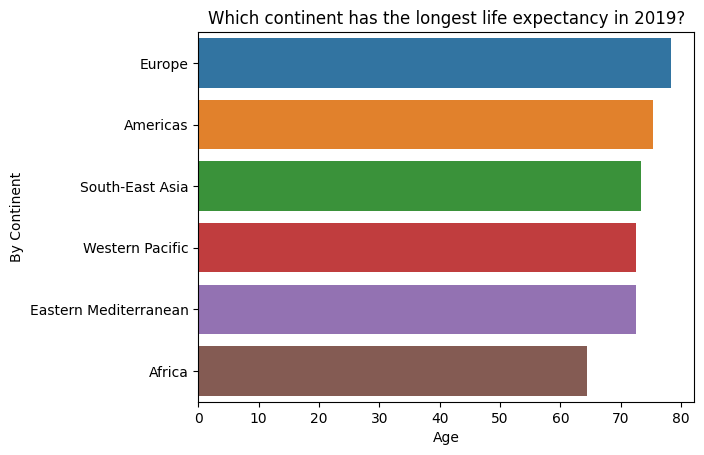

In [113]:
sns.barplot(data=df_continent, x="FactValueNumeric", y="Continent")
plt.title("Which continent has the longest life expectancy in 2019?")
plt.xlabel("Age")
plt.ylabel("By Continent")
plt.show()

In [ ]:
# Which country has the longest life expectancy in 2019?
# Where is UK?
# (Average life expectancy by country)

In [117]:
df_location=df_2019.groupby("Location", as_index=False)

In [118]:
df_location=df_location["FactValueNumeric"].mean()

In [119]:
df_location=df_location.sort_values(by=["FactValueNumeric"],ascending=False)

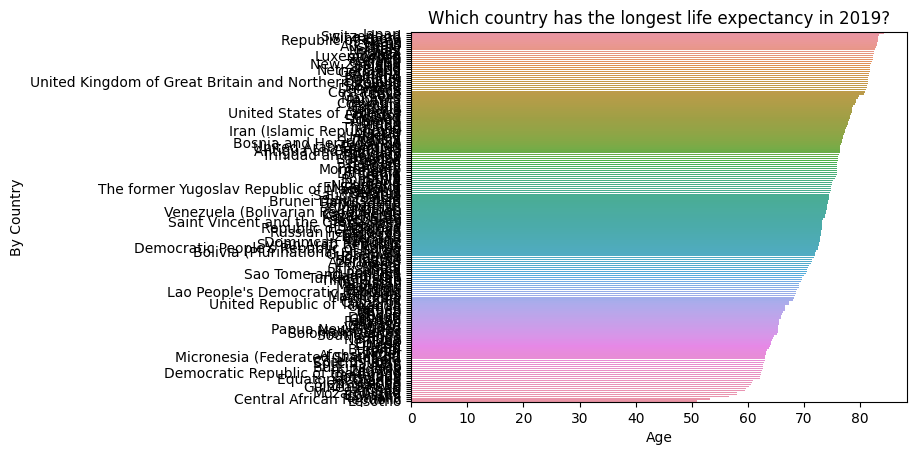

In [122]:
# I will need to find a way to select top 30 countries...

sns.barplot(data=df_location, x="FactValueNumeric", y="Location")
plt.title("Which country has the longest life expectancy in 2019?")
plt.xlabel("Age")
plt.ylabel("By Country")
plt.show()

In [ ]:
# World vs UK - Average life expectancy by sex in 2019

In [123]:
df_uk=df_2019[df_2019["Location"]=="United Kingdom of Great Britain and Northern Ireland"]

In [125]:
df_uk

,Indicator,Continent,Location,Period,Dim1,FactValueNumeric
446,Life expectancy at birth (years),Europe,United Kingdom of Great Britain and Northern I...,2019,Male,79.79
484,Life expectancy at birth (years),Europe,United Kingdom of Great Britain and Northern I...,2019,Both sexes,81.40
511,Life expectancy at birth (years),Europe,United Kingdom of Great Britain and Northern I...,2019,Female,82.99


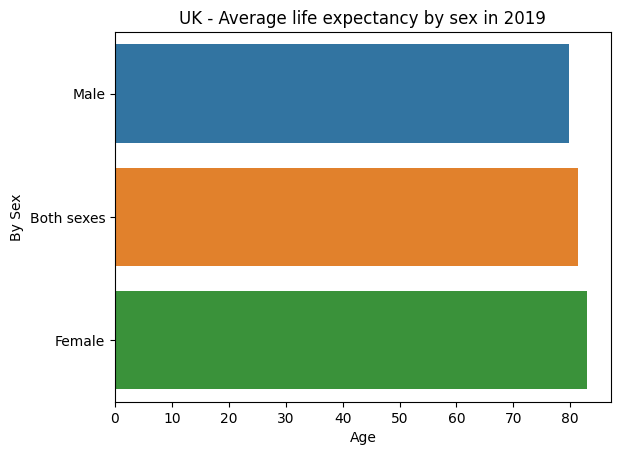

In [129]:
sns.barplot(data=df_uk, x="FactValueNumeric", y="Dim1")
plt.title("UK - Average life expectancy by sex in 2019")
plt.xlabel("Age")
plt.ylabel("By Sex")
plt.show()

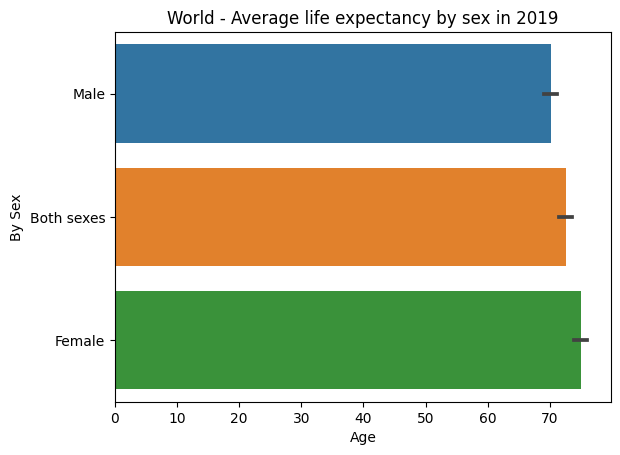

In [130]:
sns.barplot(data=df_2019, x="FactValueNumeric", y="Dim1")
plt.title("World - Average life expectancy by sex in 2019")
plt.xlabel("Age")
plt.ylabel("By Sex")
plt.show()